# Homework 3 (Due: March 26, 2018)

## 1. f-I curves

Here we ask you to reproduce Fig. 7.2 and 7.6 in Rinzel and Ermentrout by using the simulation in the part 2 and 1 of the NEURON tutorial 3, a single compartment neuron with the Morris-Lecar mechanism in a voltage clmap and current clamp mode, respectively.

1. Find the I-V relation (panel A in Fig. 7.2 and 7.6): first, use the voltage clamp to fix the membrane voltage to a certain value and and read the steady state electrode current that keeps the voltage (`vc.i` in the part 2 simulation). Then, repeat changing the voltage and reading the current. 
2. How the I-V relation changes with the half-maximum voltage of the K+ channel (`soma.betaw_ml`). Try a few different values from -20 mV to 0 mV.
3. Use the simulations in the part 1 (a current clamp mode), to compute the f-I curve (panel B) of a Morris-Lecar neuron with the same sets of the half-maximum voltage (`soma.betaw_ml`) used in 2. Verify the relationship between the I-V relation and firing property. (Hint: you can use `APCount` (https://www.neuron.yale.edu/neuron/static/py_doc/modelspec/programmatic/mechanisms/mech.html?highlight=apcount#APCount) to count spikes.)
3. Try the Hodgekin-Huxley mechanisms (`hh`) instead of the Morris-Lecar, and discuss the result.


## 1. f-I curves
### 1.1

Here is an example code to draw an I-V curve:

In [1]:
from neuron import h, gui
import numpy as np
import matplotlib.pyplot as plt

soma = h.Section(name="soma")
soma.L = 15
soma.diam = 15
soma.insert('ml')

vc = h.SEClamp(soma(0.5))
vc.dur1 = 150
vc.amp1 = -70

# Run a simulation for 100 ms and return the membrane voltage and electrode current
def run(vc_amp):
    vc.amp1 = vc_amp
    h.tstop = 100
    h.init()
    h.run()
    return vc.i, soma(0.5).v

# Run with multiple conditions
def run_batch(vc_amps):
    volts = []
    currents = []
    for a in vc_amps:
        i, v = run(a)
        volts.append(v)
        currents.append(i)
    return volts, currents


[Text(0,0.5,'Voltage (mV)'), Text(0.5,0,'Current (nA)')]

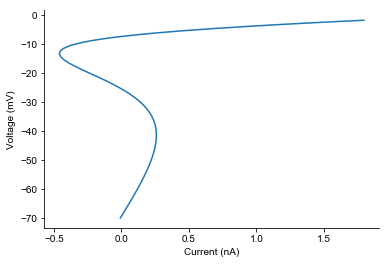

In [2]:
# Here we plot the result

vc_amps = np.arange(-70, 1)
v, i = run_batch(vc_amps)

fig, ax = plt.subplots()
ax.plot(i, v)
ax.set(ylabel='Voltage (mV)', xlabel='Current (nA)')

## 1.2
With multiple runs of the simulation above while varying `betaw_ml`, we can show that the I-V curve becomes monotonic as `betaw_ml` lowers:

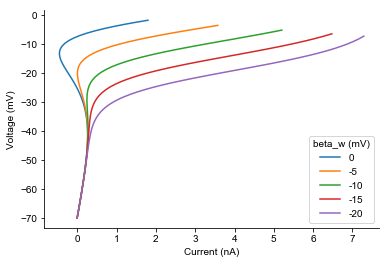

In [3]:
def run_with_betaw(betaw):
    soma.betaw_ml = betaw
    vc_amps = np.arange(-70, 1)
    v, i = run_batch(vc_amps)
    return v, i

betaws = range(0, -25, -5)

fig, ax = plt.subplots()
for betaw in betaws:
    i, v = run_with_betaw(betaw)
    ax.plot(v, i)
    
ax.set(ylabel='Voltage (mV)', xlabel='Current (nA)')
ax.legend(betaws, title='beta_w (mV)')

### 1.3

Here we switch to the current clamp simulation to obtain an f-I curve:

[Text(0,0.5,'Firing rate (Hz)'), Text(0.5,0,'Current (nA)')]

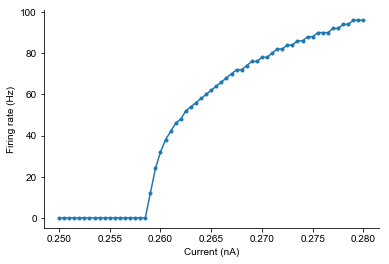

In [2]:
from neuron import h, gui
import numpy as np
import matplotlib.pyplot as plt

soma = h.Section(name="soma")
soma.L = 15
soma.diam = 15
soma.insert('ml')

ic = h.IClamp(soma(0.5))
ic.dur = 500
ic.delay = 50

apc = h.APCount(soma(0.5))

def run(ic_amp):
    ic.amp = ic_amp
    h.tstop = 550
    
    spikes = h.Vector()
    apc.record(spikes)
    h.init()
    h.run()
    
    return spikes.size()/ic.dur*1e3, ic.amp

def run_batch(ic_amps):
    currents = []
    firing_rates = []
    for a in ic_amps:
        r, i = run(a)
        currents.append(i)
        firing_rates.append(r)
    return firing_rates, currents


ic_amps = np.arange(0.25, 0.28, 0.0005)
rate, i = run_batch(ic_amps)

fig, ax = plt.subplots()
ax.plot(i, rate,'.-')
ax.set(xlabel='Current (nA)', ylabel='Firing rate (Hz)')

Now we do multiple runs with different `betaw_ml`'s:

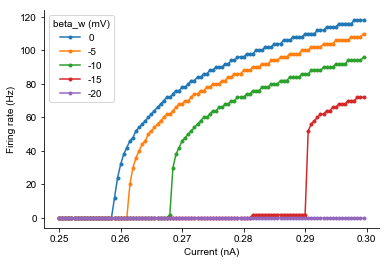

In [3]:
def run_with_betaw(betaw):
    soma.betaw_ml = betaw
    ic_amps = np.arange(0.25, 0.3, 0.0005)
    rate, i = run_batch(ic_amps)
    return rate, i

betaws = range(0, -25, -5)

fig, ax = plt.subplots()
for betaw in betaws:
    rate, i = run_with_betaw(betaw)
    ax.plot(i, rate, '.-')
    
ax.set(xlabel='Current (nA)', ylabel='Firing rate (Hz)')
ax.legend(betaws, title='beta_w (mV)')

Note that a discontinuity in the f-I curve appears when green -> red, which corresponds to the non-monotonic -> monotonic I-V curve transition (green -> red in **1.2**).

### 1.3

Now we do the same with the HH model: First, we check the I-V curve:

[Text(0,0.5,'Voltage (mV)'), Text(0.5,0,'Current (nA)')]

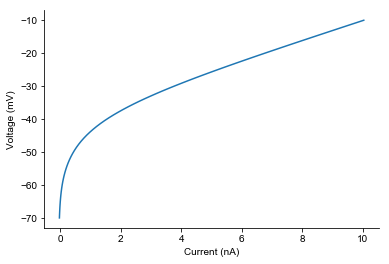

In [3]:
from neuron import h, gui
import numpy as np
import matplotlib.pyplot as plt

soma = h.Section(name="soma")
soma.L = 15
soma.diam = 15
soma.insert('hh')

vc = h.SEClamp(soma(0.5))
vc.dur1 = 150
vc.amp1 = -70

def run(vc_amp):
    vc.amp1 = vc_amp
    h.tstop = 100
    h.init()
    h.run()
    return vc.i, soma(0.5).v

def run_batch(vc_amps):
    volts = []
    currents = []
    for a in vc_amps:
        i, v = run(a)
        volts.append(v)
        currents.append(i)
    return volts, currents

vc_amps = np.arange(-70, 1)
v, i = run_batch(vc_amps)
fig, ax = plt.subplots()
ax.plot(i, v)
ax.set(ylabel='Voltage (mV)', xlabel='Current (nA)')

Monotonic increase in the I-V curve predicts that the f-I curve should have a discontinuity:

[Text(0,0.5,'Firing rate (Hz)'), Text(0.5,0,'Current (nA)')]

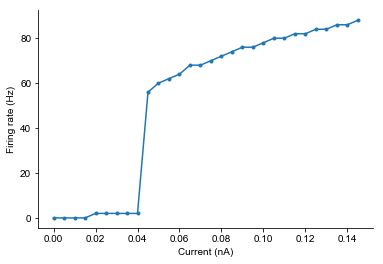

In [41]:
from neuron import h, gui
import numpy as np
import matplotlib.pyplot as plt

soma = h.Section(name="soma")
soma.L = 15
soma.diam = 15
soma.insert('hh')

ic = h.IClamp(soma(0.5))
ic.dur = 500
ic.delay = 50

apc = h.APCount(soma(0.5))

def run(ic_amp):
    ic.amp = ic_amp
    h.tstop = 550
    
    spikes = h.Vector()
    apc.record(spikes)
    h.init()
    h.run()
    
    return spikes.size()/ic.dur*1e3, ic.amp

def run_batch(ic_amps):
    currents = []
    firing_rates = []
    for a in ic_amps:
        r, i = run(a)
        currents.append(i)
        firing_rates.append(r)
    return firing_rates, currents


ic_amps = np.arange(0.0, 0.15, 0.005)
rate, i = run_batch(ic_amps)

fig, ax = plt.subplots()
ax.plot(i, rate,'.-')
ax.set(xlabel='Current (nA)', ylabel='Firing rate (Hz)')

... indeed, it does!

## 2. Channel dynamics during spike generation

Here we use the current clamp simulation of a single compartment neuron with the Hodgkin-Huxley mechanism to observe how ion channels activate during an action potential firing, triggered by a brief current injection.

Set up the same current clamp simulation as the part 1 of the NEURON tutorial 3, but with two differences:
* the neuron has the Hodgkin-Huxley mechanism (`hh`) instead of the Morris-Lecar,
* the duration of the injection (`ic.dur`) is short (1 ms).


1. Discuss how the channel activates during spike generation in a similar way to Fig. 6.5 in the textbook, by recording and showing how the channel gating variables, `m_hh`, `h_hh`, and `n_hh`, evolve in time.
2. __(Anode break excitation)__ Set the injected current (`ic.amp`) to -0.2 nA, run the simulation, and explain the result.
3. Plot the 2D phase plots of voltage and other gating variables. For example, `v` vs `n_hh`, `n_hh` vs `m_hh`, etc. In each plot, draw several trajectories with different injected currents, particularly including the negative ones (as in 2). Which pair of variables are most helpful to understand the system's behavior and how? Is your answer to the question 2 consistent with the phase plots?


## 2. Channel dynamics during spike generation
### 2.1
This part is straightforward:

[(0, 1), Text(0,0.5,'n'), Text(0.5,0,'Time (ms)')]

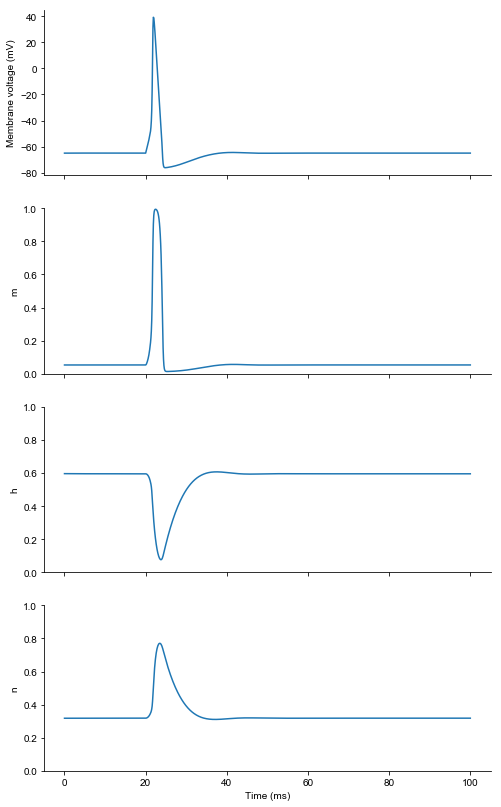

In [26]:
from neuron import h, gui
import numpy as np
import matplotlib.pyplot as plt

soma = h.Section(name="soma")
soma.L = 15
soma.diam = 15
soma.insert('hh')

ic = h.IClamp(soma(0.5))
ic.dur = 1
ic.delay = 20

dt = 0.1

def run(amp):
    ic.amp = amp

    
    vrec, mrec, nrec, hrec = [h.Vector() for _ in range(4)]
    vrec.record(soma(0.5)._ref_v, dt)
    mrec.record(soma(0.5)._ref_m_hh, dt)
    hrec.record(soma(0.5)._ref_h_hh, dt)
    nrec.record(soma(0.5)._ref_n_hh, dt)

    h.tstop = 100

    h.init()
    h.run()
    
    return vrec, mrec, hrec, nrec


recs = run(0.1)
t = np.arange(vrec.size())*dt

fig, axs = plt.subplots(nrows=4, sharex=True, figsize=(8,14))
for i, ax in enumerate(axs):
    ax.plot(t, recs[i])
axs[0].set_ylabel('Membrane voltage (mV)')
axs[1].set(ylabel='m', ylim=[0, 1])
axs[2].set(ylabel='h', ylim=[0, 1])
axs[3].set(ylabel='n', ylim=[0, 1], xlabel="Time (ms)")


### 2.2

Now with a negative and short current injection, the HH neuron generates a spike as well:

[(0, 1), Text(0,0.5,'n'), Text(0.5,0,'Time (ms)')]

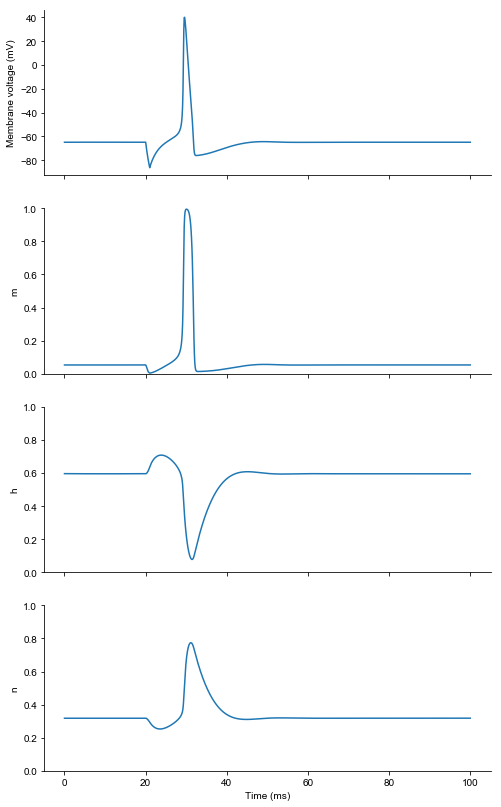

In [27]:
recs = run(-0.2)
t = np.arange(vrec.size())*dt

fig, axs = plt.subplots(nrows=4, sharex=True, figsize=(8,14))
for i, ax in enumerate(axs):
    ax.plot(t, recs[i])
axs[0].set_ylabel('Membrane voltage (mV)')
axs[1].set(ylabel='m', ylim=[0, 1])
axs[2].set(ylabel='h', ylim=[0, 1])
axs[3].set(ylabel='n', ylim=[0, 1], xlabel="Time (ms)")


### 2.3

Let's first draw the membrane voltage vs. `n` variable with several different current injections:

[Text(0,0.5,'n'), Text(0.5,0,'Voltage (mV)')]

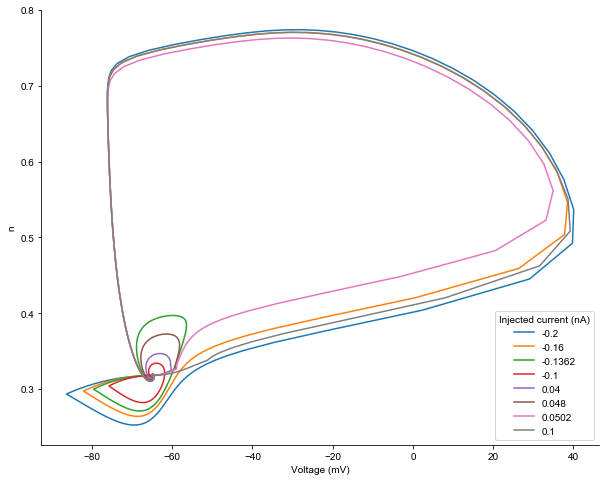

In [77]:
fig, ax = plt.subplots(figsize=(10,8))

currents = [-0.2, -0.16, -0.1362, -0.1, 0.04, 0.048, 0.0502, 0.1]
for amp in currents:
    vs, ms, hs, ns = run(amp)
    ax.plot(vs, ns)
ax.legend(currents, title="Injected current (nA)")
ax.set(xlabel="Voltage (mV)", ylabel="n")

This plot shows well what is going on with the negative current injection (blue and yellow curve):

1. the system moves to the left rapidly due to the negative current. 
2. This voltage decrease causes the K+ channel shutting down (`n` decreases), while the membrane voltage is getting restored back to the resting membrane potential at -65 mV.
3. However, when the voltage reaches -65 mV, the K+ channel is too much closed and the system is too much away from a fixed point around (V, n) ≈ (-65 mV, 0.32).
4. The membrane voltage continues to increase and eventually generates an action potential by activating the Na+ current.


Now, let's plot the membrane voltage vs `m` variable:

[Text(0,0.5,'m'), Text(0.5,0,'Voltage (mV)')]

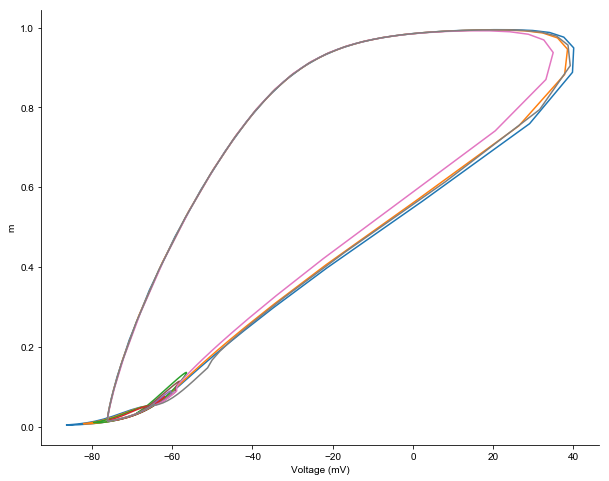

In [78]:
fig, ax = plt.subplots(figsize=(10,8))

for amp in [-0.2, -0.16, -0.1362, -0.1, 0.04, 0.048, 0.0502, 0.1]:
    vs, ms, hs, ns = run(amp)
    ax.plot(vs, ms)
ax.set(xlabel="Voltage (mV)", ylabel="m")

We can see that `m` variable is almost like a function of the membrane voltage, except during after-hyperpolarization period. This is because fast activation of the Na+ channel, and this makes it difficult to see what happens at spike initiation during negative current injection.

Now, let's plot `n` vs. `h` variable:

[Text(0,0.5,'h'), Text(0.5,0,'n')]

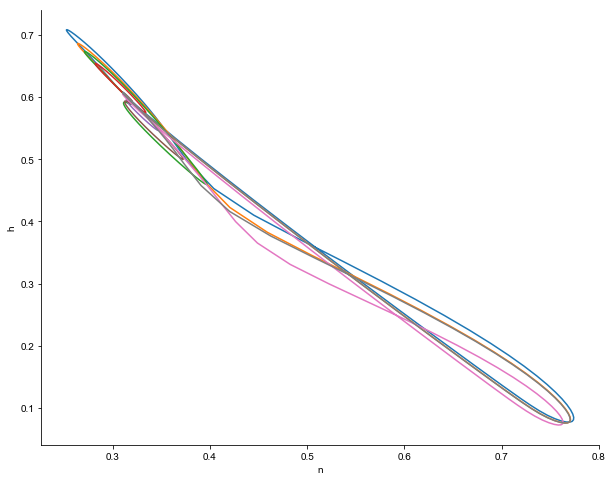

In [79]:
fig, ax = plt.subplots(figsize=(10,8))

for amp in [-0.2, -0.16, -0.1362, -0.1, 0.04, 0.048, 0.0502, 0.1]:
    vs, ms, hs, ns = run(amp)
    ax.plot(ns, hs)

ax.set(xlabel="n", ylabel="h")

We can see that `h` acts almost like a linear function of `n`, which make this plot quite uninformative again. However, this is a special property of the HH model coming from the fact that the time scale of the Na+ channel inactivation is accidentally very similar to that of the K+ channel activation. Therefore, in other neurons, it can be different.